# Data Gathering 

Reference
https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e

In [1]:
# !pip install pandas-datareader

In [2]:
# !pip install yfinance
# !pip install matplotlib
# !pip install seaborn

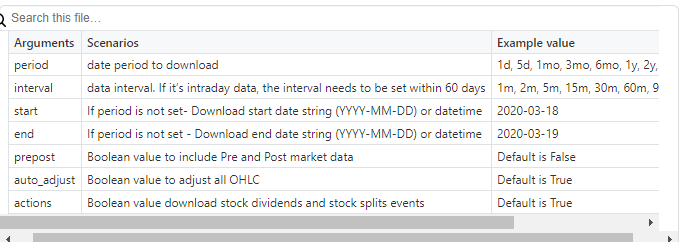

In [2]:
from IPython.display import Image
Image(filename='2021-03-05_17h03_49.png') 

- Thai SETI  www.investing.com
- Vietnam VNI www.investing.com

Asean
- Singapore ^STI
- Malaysia ^KLSE
- Indonesia ^JKSE
- Philippines PSEI.PS

Asia
- Hong Kong ^HSI
- China 399001.SZ
- South Korea ^KS11
- Japan ^N225
- Australia ^AORD
- New Zealand ^NZ50
- Taiwan ^TWII
- BSE SENSEX India ^BSESN
- India ^NSEI

Western
- USA ^DJI
- USA NY ^NYA
- USA AMEX ^XAX
- USA Chicago ^RUT
- USA Toronto ^GSPTSE
- GB ^FTSE
- German  ^GDAXI
- Paris ^FCHI
- Zurich ^STOXX50E
- Brussels ^BFX
- Russia IMOEX.ME
- Sao Paolo(Brazilian) ^BVSP
- Mexico ^MXX
- Santiago(Chile) ^IPSA
- Buenos Aires(Argentina) ^MERV
- Tel Aviv(Israel) ^TA125.TA
- Egyptian ^CASE30
- Johannesburg(South Africa)  ^JN0U.JO

-Other
- Gold GC=F
- Crude Oil CL=F
- Bitcoin USD BTC-USD

## Get stock value one by one

In [3]:
import yfinance as yf
tricker = "^DJI"
stockData = yf.Ticker(tricker)

# get stock info
print(stockData.info)

start ="2010-01-01"
end ="2020-12-31"
# get historical market data
hist = stockData.history(start=start, end=end)
hist.head()

# hist.info()

{'previousClose': 34133, 'regularMarketOpen': 34163.99, 'twoHundredDayAverage': 31063.926, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 34331.2, 'navPrice': None, 'averageDailyVolume10Day': 340731428, 'totalAssets': None, 'regularMarketPreviousClose': 34133, 'fiftyDayAverage': 33503.164, 'trailingAnnualDividendRate': None, 'open': 34163.99, 'toCurrency': None, 'averageVolume10days': 340731428, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 34039.66, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 255811646, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 198001056, 'priceToSalesTrailing12Months': None, 'dayLow': 34039.66, 'ask': 34319.96, 'ytdReturn': None, 'askSize': 0, 'volume': 25581164

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,10548.509766,10555.009766,10423.129883,10428.049805,1379400,0,0
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,1797800,0,0
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,1885400,0,0
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,1860400,0,0
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,2173900,0,0


In [2]:
# Save data 
data_df = yf.download(tricker, start=start, end=end)
data_df.to_csv(tricker+'.csv')

[*********************100%***********************]  1 of 1 completed


## Get all stock price in Dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3531 entries, 2009-12-24 to 2020-12-31
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SET                              2684 non-null   float64
 1   VNI                              2745 non-null   float64
 2   STI Index                        2744 non-null   float64
 3   FTSE Bursa Malaysia KLCI         2699 non-null   float64
 4   Composite Index                  2683 non-null   float64
 5   PSEi INDEX                       2676 non-null   float64
 6   HANG SENG INDEX                  2707 non-null   float64
 7   Shenzhen Component               2674 non-null   float64
 8   KOSPI Composite Index            2710 non-null   float64
 9   Nikkei 225                       2696 non-null   float64
 10  ALL ORDINARIES                   2780 non-null   float64
 11  S&P/NZX 50 INDEX GROSS ( GROSS   2686 non-null   float64
 12  TS

<AxesSubplot:xlabel='Date'>

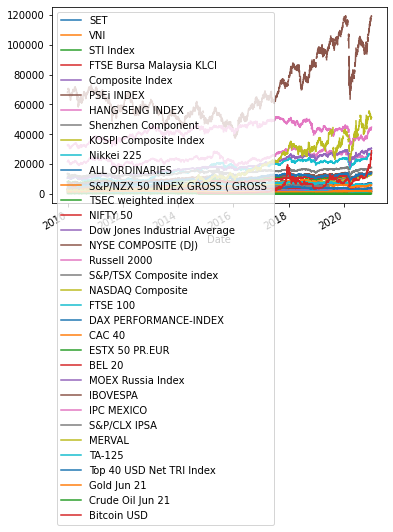

In [8]:
import yfinance as yf
import pandas as pd

df_trickers = pd.read_csv("StockIndexTrickers.csv")
# print(df_trickers.head())
# df_trickers.info()

start ="2009-12-25"
# start ="2010-01-01"
end ="2020-12-31"

stockDataList = []

trickers = df_trickers[df_trickers["FromYahoo"]==1][["Trickers","Stock Index"]]
# trickers
                                  
for index, row in trickers.iterrows():
    stockData = yf.Ticker(row["Trickers"])
    histData = stockData.history(start=start, end=end)
    dataFrame = pd.DataFrame(histData["Close"])
    dataFrame.columns =[stockData.info['shortName']]
    stockDataList.append(dataFrame)
    
stockThai = pd.read_csv("SET Index Historical Data.csv")
stockThai['Date'] = pd.to_datetime(stockThai['Date'])
stockThai = stockThai.set_index('Date')
df_stockThai = pd.DataFrame(stockThai['Close'].str.replace(',','').astype(float))
df_stockThai.columns =['SET']

stockVietnam = pd.read_csv("VN Historical Data.csv")
stockVietnam['Date'] = pd.to_datetime(stockVietnam['Date'])
stockVietnam = stockVietnam.set_index('Date')
df_stockVietnam = pd.DataFrame(stockVietnam['Close'].str.replace(',','').astype(float))
df_stockVietnam.columns =["VNI"]

df_allStocks = pd.merge(df_stockThai, df_stockVietnam, how= "outer",left_index=True, right_index=True)

for i in range(len(stockDataList)):
    df_allStocks = pd.merge(df_allStocks, stockDataList[i], how= "outer",left_index=True, right_index=True)
    
df_allStocks.info()
df_allStocks.plot()

## Handle null value

In [6]:
# print(df_allStocks.isnull().sum())

In [5]:
df_allStocks = df_allStocks.ffill()

In [4]:
# df_allStocks.isnull().sum()

In [9]:
start2 ="2010-01-01"
end2 ="2020-12-31"
df_allStocks = df_allStocks.loc[start2:end2]

df_allStocks.head()

,SET,VNI,STI Index,FTSE Bursa Malaysia KLCI,Composite Index,PSEi INDEX,HANG SENG INDEX,Shenzhen Component,KOSPI Composite Index,Nikkei 225,...,MOEX Russia Index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,Top 40 USD Net TRI Index,Gold Jun 21,Crude Oil Jun 21,Bitcoin USD
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,732.28,517.05,2894.550049,1275.750000,2575.312988,3004.237549,21823.279297,13533.387695,1696.140015,10654.790039,...,NaN,70045.0,32758.529297,3620.699951,2384.489990,1089.339966,NaN,1117.699951,81.510002,NaN
2010-01-05,732.11,532.53,2920.280029,1288.239990,2605.175537,3027.681396,22279.580078,13517.228516,1690.619995,10681.830078,...,NaN,70240.0,32732.759766,3624.100098,2401.750000,1098.199951,NaN,1118.099976,81.769997,NaN
2010-01-06,735.73,534.46,2930.489990,1293.170044,2603.195557,3039.148438,22416.669922,13505.028320,1705.319946,10731.450195,...,NaN,70729.0,32830.160156,3639.959961,2362.459961,1098.310059,NaN,1135.900024,83.180000,NaN
2010-01-07,734.63,533.34,2913.250000,1291.420044,2586.794189,3076.988770,22269.449219,13235.332031,1683.449951,10681.660156,...,NaN,70451.0,33064.570312,3681.060059,2389.449951,1094.040039,NaN,1133.099976,82.660004,NaN
2010-01-08,738.96,520.90,2922.760010,1292.979980,2614.268311,3076.388916,22296.750000,13267.291992,1695.260010,10798.320312,...,NaN,70263.0,32892.039062,3726.500000,2352.760010,NaN,NaN,1138.199951,82.750000,NaN


## Save raw data to csv

In [10]:
# Save data 
df_allStocks.to_csv('StocksData.csv')